# Unit Test Class `ClassHeatSimulation`

Demonstrate that the class can:
1. Simulate from default isothermal conditions
2. Simulate from initial conditions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import GridSimulator

# Stainless Steel Bar

Configure the solver

In [2]:
HeatSimulation = GridSimulator.ClassHeatSimulation()

numberNodes = 8
thicknessTotal = 0.155
widthBar = 0.005
thicknessBar = 0.025

materialDensity = 7800
materialSpecificHeat = 500
materialThermalConductivity = 16.2

convectionCoefficient = 4
convectionTemperature = 25

temperatureHeatSource = 0
temperatureInitialIsothermal = 25
doesSurfaceTemperatureAllowConduction = False

HeatSimulation.SetSize(widthBar,thicknessBar)
HeatSimulation.SetNodes(numberNodes,thicknessTotal)
HeatSimulation.SetMaterialProperties(materialDensity,materialSpecificHeat,materialThermalConductivity)
HeatSimulation.SetConvectionProperties(convectionCoefficient,convectionTemperature)
HeatSimulation.EnableSurfaceHeatTransfer(doesSurfaceTemperatureAllowConduction)
HeatSimulation.SetHeatSource(temperatureHeatSource)
HeatSimulation.SetInitalTemp(temperatureInitialIsothermal)
HeatSimulation.UpdatePropertiesTable()

## Single Simulation to 6000 sec

In [3]:
HeatSimulation.UpdatePropertiesTable()
dTimeRecommend = HeatSimulation.SuggestedTimeInc(True)
timeStart = 0
timeEnd = 6000
noStepsMin =( timeEnd - timeStart)/dTimeRecommend
noSteps = int(np.ceil(noStepsMin*1.2))
timeSequence = np.linspace(timeStart, timeEnd, noSteps)
dTimeLinspace = timeSequence[1] - timeSequence[0]

HeatSimulation.TimeInc = dTimeLinspace
HeatSimulation.GlobalTime = 0
HeatSimulation.CreateDF()
for timeInc in timeSequence[0:-1]:
    HeatSimulation.CalculateAllNodes() 
HeatSimulation.UpdatePropertiesTable()
dfOutput = HeatSimulation.AllTemp

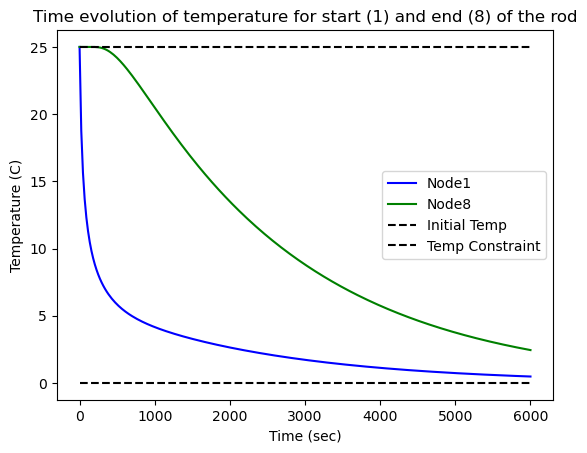

In [4]:
plt.figure()
plt.plot(dfOutput['Time'], dfOutput['Node1'], '-b', label='Node1')
plt.plot(dfOutput['Time'], dfOutput['Node8'], '-g', label='Node8')
plt.plot(dfOutput['Time'], dfOutput['Node1'][0]*np.ones(dfOutput['Time'].shape), '--k', label='Initial Temp')
plt.plot(dfOutput['Time'], HeatSimulation.TempLeftEnd*np.ones(dfOutput['Time'].shape), '--k', label='Temp Constraint')
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (C)")
plt.title("Time evolution of temperature for start (1) and end (8) of the rod")
plt.show()

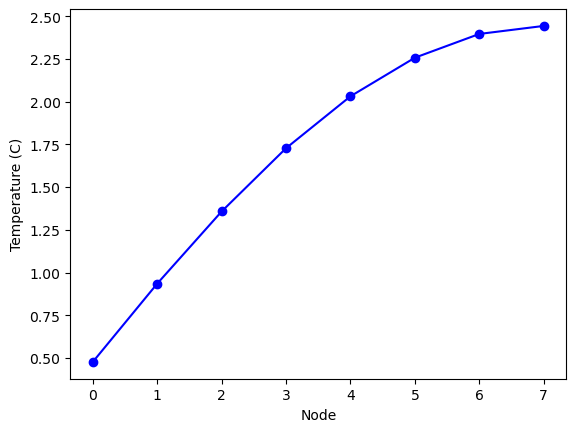

In [5]:
temperatureProfileEnd = dfOutput.iloc[-1, 2:-1].to_numpy()

plt.figure()
plt.plot(temperatureProfileEnd, 'o-b')
plt.xlabel("Node")
plt.ylabel("Temperature (C)")
plt.show()

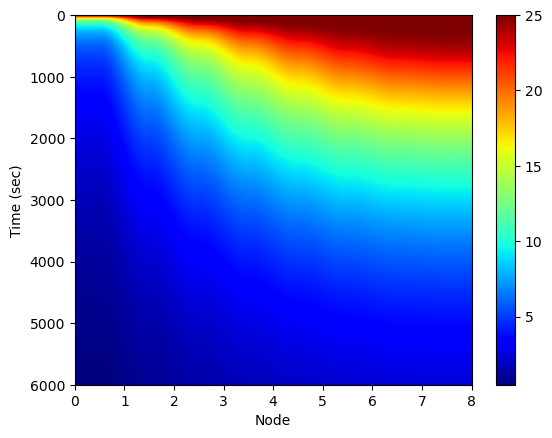

In [6]:
temperatureMap = dfOutput.iloc[:, 2:-1].to_numpy()

plt.figure()
plt.imshow(temperatureMap, cmap='jet', extent=(0, HeatSimulation.NumNodes, \
          np.max(dfOutput['Time']), np.min(dfOutput['Time']) ))
plt.gca().set_aspect('auto')
plt.xlabel("Node")
plt.ylabel("Time (sec)")
plt.colorbar()
plt.show()

# Two Simulations, one starting after the other

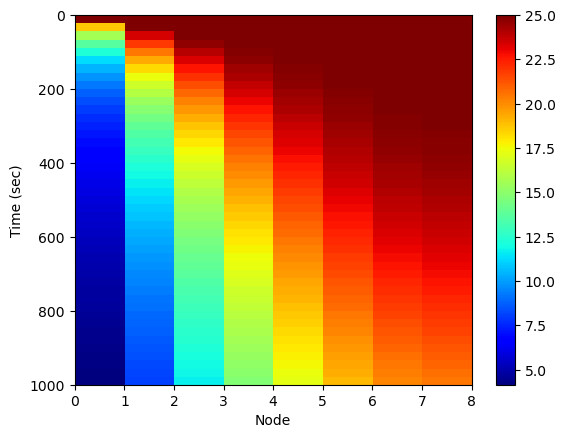

In [7]:
HeatSimulation.SetInitalTemp(temperatureInitialIsothermal)
HeatSimulation.UpdatePropertiesTable()
dTimeRecommend = HeatSimulation.SuggestedTimeInc(True)
timeStart = 0
timeEnd = 1000
noStepsMin =( timeEnd - timeStart)/dTimeRecommend
noSteps = int(np.ceil(noStepsMin*1.2))
timeSequence = np.linspace(timeStart, timeEnd, noSteps)
dTimeLinspace = timeSequence[1] - timeSequence[0]

HeatSimulation.TimeInc = dTimeLinspace
HeatSimulation.GlobalTime = 0
HeatSimulation.CreateDF()
for timeInc in timeSequence[0:-1]:
    HeatSimulation.CalculateAllNodes() 
HeatSimulation.UpdatePropertiesTable()
dfOutputB1 = HeatSimulation.AllTemp

temperatureMap = dfOutputB1.iloc[:, 2:-1].to_numpy()

plt.figure()
plt.imshow(temperatureMap, cmap='jet', extent=(0, HeatSimulation.NumNodes, \
          np.max(dfOutputB1['Time']), np.min(dfOutputB1['Time']) ))
plt.gca().set_aspect('auto')
plt.xlabel("Node")
plt.ylabel("Time (sec)")
plt.colorbar()
plt.show()

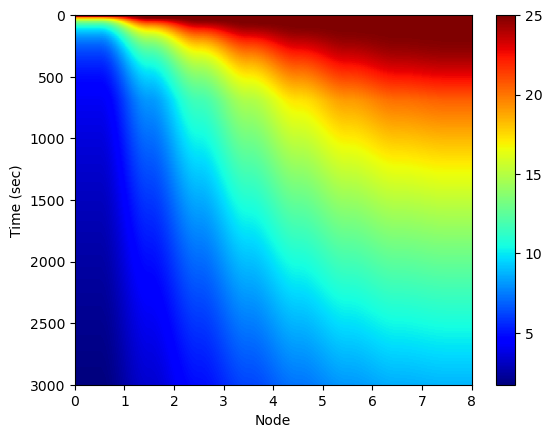

In [8]:
dTimeRecommend = HeatSimulation.SuggestedTimeInc(True)
timeStart = 1000
timeEnd = 3000
noStepsMin =( timeEnd - timeStart)/dTimeRecommend
noSteps = int(np.ceil(noStepsMin*2.0))
timeSequence = np.linspace(timeStart, timeEnd, noSteps)
dTimeLinspace = timeSequence[1] - timeSequence[0]

HeatSimulation.TimeInc = dTimeLinspace
for timeInc in timeSequence[0:-1]:
    HeatSimulation.CalculateAllNodes() 
HeatSimulation.UpdatePropertiesTable()
dfOutputB2 = HeatSimulation.AllTemp

temperatureMap = dfOutputB2.iloc[:, 2:-1].to_numpy()

plt.figure()
plt.imshow(temperatureMap, cmap='jet', extent=(0, HeatSimulation.NumNodes, \
          np.max(dfOutputB2['Time']), np.min(dfOutputB2['Time']) ))
plt.gca().set_aspect('auto')
plt.xlabel("Node")
plt.ylabel("Time (sec)")
plt.colorbar()
plt.show()

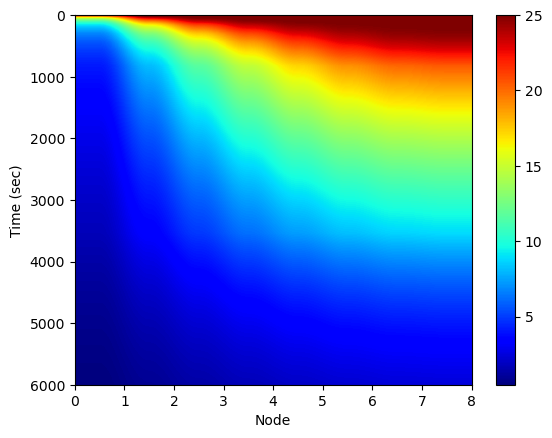

In [9]:
dTimeRecommend = HeatSimulation.SuggestedTimeInc(True)
timeStart = 3000
timeEnd = 6000
noStepsMin =( timeEnd - timeStart)/dTimeRecommend
noSteps = int(np.ceil(noStepsMin*1.2))
timeSequence = np.linspace(timeStart, timeEnd, noSteps)
dTimeLinspace = timeSequence[1] - timeSequence[0]

HeatSimulation.TimeInc = dTimeLinspace
for timeInc in timeSequence[0:-1]:
    HeatSimulation.CalculateAllNodes() 
HeatSimulation.UpdatePropertiesTable()
dfOutputB2 = HeatSimulation.AllTemp

temperatureMap = dfOutputB2.iloc[:, 2:-1].to_numpy()

plt.figure()
plt.imshow(temperatureMap, cmap='jet', extent=(0, HeatSimulation.NumNodes, \
          np.max(dfOutputB2['Time']), np.min(dfOutputB2['Time']) ))
plt.gca().set_aspect('auto')
plt.xlabel("Node")
plt.ylabel("Time (sec)")
plt.colorbar()
plt.show()

# Comparison

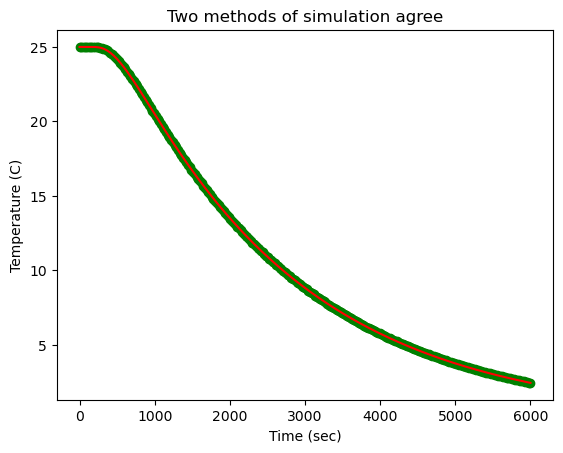

In [10]:
plt.figure()
plt.plot(dfOutput['Time'], dfOutput['Node8'], 'og', label='Continuous')
plt.plot(dfOutputB2['Time'], dfOutputB2['Node8'], '-r', label='Discrete')
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (C)")
plt.title("Two methods of simulation agree")
plt.show()

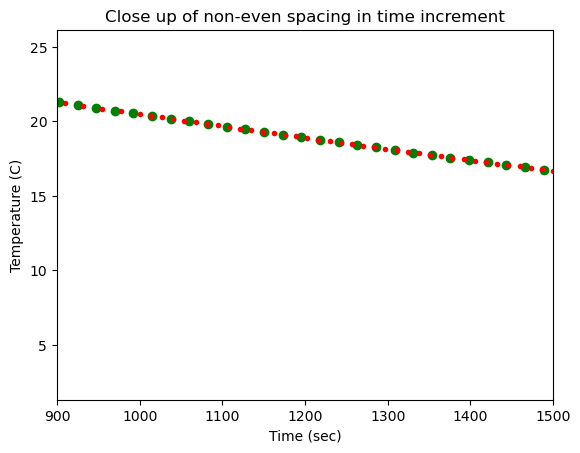

In [11]:
plt.figure()
plt.plot(dfOutput['Time'], dfOutput['Node8'], 'og', label='Continuous')
plt.plot(dfOutputB2['Time'], dfOutputB2['Node8'], '.r', label='Discrete')
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (C)")
plt.xlim([900, 1500])
plt.title("Close up of non-even spacing in time increment")
plt.show()

# Test Adding Time to the Simulation

Added a new method:  `AdvanceSimulationByTime(timeIncrement, temperatureHeatSource)`

This method is supposed to add more data to the simulation; enough to account for exactly the time increment, using close to the recommended time step increment.  These new simulation points are added with the temperature specified

In [12]:
HeatSimulation.SetInitalTemp(temperatureInitialIsothermal)
HeatSimulation.UpdatePropertiesTable()

Clear the simulation

In [14]:
HeatSimulation.CreateDF()
HeatSimulation.AllTemp

,Time,Heater,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Convection
0,0,0,25,25,25,25,25,25,25,25,25


In [15]:
HeatSimulation.AdvanceSimulationByTime(200, 50)
HeatSimulation.AllTemp

,Time,Heater,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Convection
0,0.0,0.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
1,25.0,50.0,31.915873,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
2,50.0,50.0,35.005402,26.913172,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
3,75.0,50.0,36.914838,28.622515,25.529250,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
4,100.0,50.0,38.240705,30.060756,26.238546,25.146409,25.000000,25.000000,25.000000,25.000000,25.0
5,125.0,50.0,39.230877,31.266259,26.993780,25.408030,25.040502,25.000000,25.000000,25.000000,25.0
6,150.0,50.0,40.006701,32.287633,27.737023,25.745033,25.130969,25.011204,25.000000,25.000000,25.0
7,175.0,50.0,40.635833,33.164139,28.444827,26.126215,25.267709,25.041236,25.003099,25.000000,25.0
8,200.0,50.0,41.159357,33.925544,29.108944,26.530131,25.442552,25.093336,25.012792,25.001715,25.0


In [16]:
HeatSimulation.AdvanceSimulationByTime(300, -50)
HeatSimulation.AllTemp

,Time,Heater,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Convection
0,0.000000,0.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
1,25.000000,50.0,31.915873,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
2,50.000000,50.0,35.005402,26.913172,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
3,75.000000,50.0,36.914838,28.622515,25.529250,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
4,100.000000,50.0,38.240705,30.060756,26.238546,25.146409,25.000000,25.000000,25.000000,25.000000,25.0
5,125.000000,50.0,39.230877,31.266259,26.993780,25.408030,25.040502,25.000000,25.000000,25.000000,25.0
6,150.000000,50.0,40.006701,32.287633,27.737023,25.745033,25.130969,25.011204,25.000000,25.000000,25.0
7,175.000000,50.0,40.635833,33.164139,28.444827,26.126215,25.267709,25.041236,25.003099,25.000000,25.0
8,200.000000,50.0,41.159357,33.925544,29.108944,26.530131,25.442552,25.093336,25.012792,25.001715,25.0
9,223.076923,-50.0,16.034139,34.542792,29.680375,26.910926,25.631097,25.161943,25.030531,25.007372,25.0
